In [1]:
"""
This is a comment
written in
more than just one line
"""
print("Hello, World!")


Hello, World!


In [47]:
import networkx as nx
import numpy as np
from collections import defaultdict
import random
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
N = 5
#M = 5
I = 3
J = 3
K = 5
Channel_upperbound = 15
Data_upperbound = 50
Processing_upperbound = 25
self_looped = 100

In [4]:
#Channel_link_same = np.triu(np.random.randint(Channel_upperbound,size=(N+1, M+1)) +1 , k = 1)
#Channel_link_same = Channel_link_same + Channel_link_same.T
#Channel_link_same[0,:] = 0
#print(Channel_link_same)

In [5]:
Channel_link_general = np.random.randint(Channel_upperbound,size=(N+1, N+1),) +1
Channel_link_general = Channel_link_general - np.diag(np.diag(Channel_link_general)) + self_looped*np.eye(N+1,N+1)
Channel_link_general[:,0] = 0
print(Channel_link_general)

[[  0.   4.  11.   7.   2.   4.]
 [  0. 100.  12.  10.   1.  10.]
 [  0.   4. 100.   7.  12.   9.]
 [  0.   4.   8. 100.   1.   1.]
 [  0.  13.  11.   4. 100.  14.]
 [  0.  15.  10.  12.   3. 100.]]


In [158]:
Data_Queue = np.random.randint(Data_upperbound,size=(I, J))+1
print(Data_Queue)


[[24 19 46]
 [ 3 16 32]
 [25 36 43]]


In [159]:
flag = True
while flag:
    VM_Data_type = np.sort(np.array([np.array(np.random.choice(K, I, replace = False)) for i in range(N)])) + 1
    uniques = np.unique(VM_Data_type)
    flag = (len(uniques)<K)
print(VM_Data_type)

[[3 4 5]
 [2 3 5]
 [1 3 5]
 [1 2 4]
 [3 4 5]]


flag = True
while flag:
    VM_Data_type = np.array([ np.sort(np.random.choice(K, np.random.randint(1,K), replace = False)) for i in range(N) ]) + 1
    print(VM_Data_type)
    print(VM_Data_type.flatten())
    uniques = np.unique(VM_Data_type.flatten())
    flag = (len(uniques)<K)
print(VM_Data_type)

type_selected = np.random.randint(1,K,K)
print(type_selected)
VM_Data_type = np.array([np.sort(np.random.choice(K, type_selected[i], replace = False)) for i in range(N)])
print(np.ravel(VM_Data_type[0]))
print(VM_Data_type)
uniques = np.unique(VM_Data_type.flatten())
print(uniques)

In [181]:
np.ndarray([[1,2],[3,4,5]],dtype=int)

TypeError: 'list' object cannot be interpreted as an integer

In [182]:
Data_type_Queue = np.array([np.array(np.random.choice(K, J, replace = False)) for i in range(I)], dtype="object")+1
print(Data_type_Queue)

[[1 3 5]
 [2 1 3]
 [2 4 1]]


In [183]:
VM_Data_speed_preset = np.array([np.array(np.random.choice(Processing_upperbound, K, replace = False)) for i in range(N)]) + 1
VM_Data_speed_bolean = np.zeros((N,K))
for row in range(N):
    VM_Data_speed_bolean[row,VM_Data_type[row,:]-1] = 1

VM_Data_speed = VM_Data_speed_bolean * VM_Data_speed_preset
#print(VM_Data_speed_preset)
#print(Data_type_Queue)
print(VM_Data_speed)

[[ 0.  0. 16.  5. 19.]
 [ 0. 24. 23.  0. 13.]
 [21.  0. 19.  0. 15.]
 [10. 25.  0. 14.  0.]
 [ 0.  0. 15. 21.  3.]]


In [184]:
Processing_time = np.ceil(np.kron(Data_Queue,1./VM_Data_speed))
print(Processing_time)

[[inf inf  2.  5.  2. inf inf  2.  4.  1. inf inf  3. 10.  3.]
 [inf  1.  2. inf  2. inf  1.  1. inf  2. inf  2.  2. inf  4.]
 [ 2. inf  2. inf  2.  1. inf  1. inf  2.  3. inf  3. inf  4.]
 [ 3.  1. inf  2. inf  2.  1. inf  2. inf  5.  2. inf  4. inf]
 [inf inf  2.  2.  8. inf inf  2.  1.  7. inf inf  4.  3. 16.]
 [inf inf  1.  1.  1. inf inf  1.  4.  1. inf inf  2.  7.  2.]
 [inf  1.  1. inf  1. inf  1.  1. inf  2. inf  2.  2. inf  3.]
 [ 1. inf  1. inf  1.  1. inf  1. inf  2.  2. inf  2. inf  3.]
 [ 1.  1. inf  1. inf  2.  1. inf  2. inf  4.  2. inf  3. inf]
 [inf inf  1.  1.  1. inf inf  2.  1.  6. inf inf  3.  2. 11.]
 [inf inf  2.  5.  2. inf inf  3.  8.  2. inf inf  3.  9.  3.]
 [inf  2.  2. inf  2. inf  2.  2. inf  3. inf  2.  2. inf  4.]
 [ 2. inf  2. inf  2.  2. inf  2. inf  3.  3. inf  3. inf  3.]
 [ 3.  1. inf  2. inf  4.  2. inf  3. inf  5.  2. inf  4. inf]
 [inf inf  2.  2.  9. inf inf  3.  2. 12. inf inf  3.  3. 15.]]


<ipython-input-184-f1188eb3a796>:1: RuntimeWarning: divide by zero encountered in true_divide
  Processing_time = np.ceil(np.kron(Data_Queue,1./VM_Data_speed))


In [169]:
Processing_time_alt=np.ceil(np.reshape(Processing_time,(I,N,J,N)))
Processing_time_final = 1./np.zeros((I,J,N))
for i in range(I):
    for j in range(J):
        function_type = Data_type_Queue[i,j]-1
        #print(Data_type_Queue[i,j]-1)
        Processing_time_final[i,j] = Processing_time_alt[i,:,j,function_type]
print(Processing_time_alt[0,:,0,:])

[[inf inf  2.  8.  2.]
 [inf  3.  4. inf  2.]
 [ 2. inf  1. inf  2.]
 [12.  4. inf  4. inf]
 [inf inf  2.  2.  2.]]


<ipython-input-169-f7e45b9883a8>:2: RuntimeWarning: divide by zero encountered in true_divide
  Processing_time_final = 1./np.zeros((I,J,N))


In [170]:
print(Processing_time_final[:,:,:])

[[[inf inf  2. 12. inf]
  [ 1.  1.  2. inf  1.]
  [ 3.  8.  2. inf  3.]]

 [[ 1.  1.  1. inf  1.]
  [ 1.  1.  2. inf  1.]
  [inf inf  3. 16. inf]]

 [[inf  3. inf  4. inf]
  [ 3.  6.  2. inf  2.]
  [inf inf  4. 22. inf]]]


In [174]:
Transmission_time = np.ceil(np.kron(Data_Queue,1./Channel_link_general))
print(Transmission_time)

[[inf  6.  3.  4. 12.  6. inf  5.  2.  3. 10.  5. inf 12.  5.  7. 23. 12.]
 [inf  1.  2.  3. 24.  3. inf  1.  2.  2. 19.  2. inf  1.  4.  5. 46.  5.]
 [inf  6.  1.  4.  2.  3. inf  5.  1.  3.  2.  3. inf 12.  1.  7.  4.  6.]
 [inf  6.  3.  1. 24. 24. inf  5.  3.  1. 19. 19. inf 12.  6.  1. 46. 46.]
 [inf  2.  3.  6.  1.  2. inf  2.  2.  5.  1.  2. inf  4.  5. 12.  1.  4.]
 [inf  2.  3.  2.  8.  1. inf  2.  2.  2.  7.  1. inf  4.  5.  4. 16.  1.]
 [inf  1.  1.  1.  2.  1. inf  4.  2.  3.  8.  4. inf  8.  3.  5. 16.  8.]
 [inf  1.  1.  1.  3.  1. inf  1.  2.  2. 16.  2. inf  1.  3.  4. 32.  4.]
 [inf  1.  1.  1.  1.  1. inf  4.  1.  3.  2.  2. inf  8.  1.  5.  3.  4.]
 [inf  1.  1.  1.  3.  3. inf  4.  2.  1. 16. 16. inf  8.  4.  1. 32. 32.]
 [inf  1.  1.  1.  1.  1. inf  2.  2.  4.  1.  2. inf  3.  3.  8.  1.  3.]
 [inf  1.  1.  1.  1.  1. inf  2.  2.  2.  6.  1. inf  3.  4.  3. 11.  1.]
 [inf  7.  3.  4. 13.  7. inf  9.  4.  6. 18.  9. inf 11.  4.  7. 22. 11.]
 [inf  1.  3.  3. 25.  3.

<ipython-input-174-fea94200f4d0>:1: RuntimeWarning: divide by zero encountered in true_divide
  Transmission_time = np.ceil(np.kron(Data_Queue,1./Channel_link_general))


In [175]:
len(Channel_link_general)

6

In [173]:
Transmission_time_alt=np.ceil(np.reshape(Transmission_time,(I,N+1,J,N+1)))
print(Transmission_time_alt[0,:,0,:])

[[inf  6.  3.  4. 12.  6.]
 [inf  1.  2.  3. 24.  3.]
 [inf  6.  1.  4.  2.  3.]
 [inf  6.  3.  1. 24. 24.]
 [inf  2.  3.  6.  1.  2.]
 [inf  2.  3.  2.  8.  1.]]


In [188]:
import networkx as nx
#network = np.ones((N,N))-np.eye(N)
#print(network)
G = nx.from_numpy_matrix(Channel_link_general,create_using=nx.DiGraph(directed=True))
edge_label = {}
for j, edge in enumerate(G.edges()):
    #edge_label.update({(edge[0],edge[1]): "<"+ str(Channel_link_general[edge[0]+1,edge[1]+1])+ "|" +str(Channel_link_general[edge[1]+1,edge[0]+1])+">" })
    print(edge)
    if edge[1] > edge[0]:
        edge_label.update({(edge[0],edge[1]): "<" + str(int(Channel_link_general[edge[0],edge[1]])) + "|" })
    else:
        edge_label.update({(edge[0],edge[1]): "|" + str(int(Channel_link_general[edge[0],edge[1]])) + ">" })

(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(1, 1)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(2, 1)
(2, 2)
(2, 3)
(2, 4)
(2, 5)
(3, 1)
(3, 2)
(3, 3)
(3, 4)
(3, 5)
(4, 1)
(4, 2)
(4, 3)
(4, 4)
(4, 5)
(5, 1)
(5, 2)
(5, 3)
(5, 4)
(5, 5)


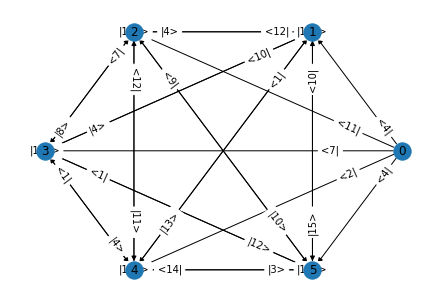

In [189]:
pos = nx.circular_layout(G)
#graph = nx.draw(G,pos,with_labels = True, connectionstyle='arc3, rad = 0.1')
graph = nx.draw(G,pos,with_labels = True)
graph = nx.draw_networkx_edge_labels(G,pos,edge_labels = edge_label,label_pos = 0.8)

In [28]:
G.edges()

OutEdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 2), (1, 3), (1, 4), (2, 0), (2, 1), (2, 3), (2, 4), (3, 0), (3, 1), (3, 2), (3, 4), (4, 0), (4, 1), (4, 2), (4, 3)])

In [29]:
pos

{0: array([1.00000000e+00, 2.38418583e-08]),
 1: array([0.30901696, 0.95105658]),
 2: array([-0.80901709,  0.58778522]),
 3: array([-0.80901698, -0.58778535]),
 4: array([ 0.30901711, -0.95105647])}

In [30]:
Channel_link_general

array([[  0.,   4.,  11.,   7.,   2.,   4.],
       [  0., 100.,  12.,  10.,   1.,  10.],
       [  0.,   4., 100.,   7.,  12.,   9.],
       [  0.,   4.,   8., 100.,   1.,   1.],
       [  0.,  13.,  11.,   4., 100.,  14.],
       [  0.,  15.,  10.,  12.,   3., 100.]])

In [39]:
H = nx.from_numpy_matrix(Channel_link_general,create_using=nx.DiGraph(directed=True))
#pos = nx.circular_layout(H,center=(1, 1))
pos = draw_random
#graph = nx.draw(G,pos,with_labels = True, connectionstyle='arc3, rad = 0.1')


In [40]:
edge_label = {}
for j, edge in enumerate(H.edges()):
    #edge_label.update({(edge[0],edge[1]): "<"+ str(Channel_link_general[edge[0]+1,edge[1]+1])+ "|" +str(Channel_link_general[edge[1]+1,edge[0]+1])+">" })
    if edge[1] > edge[0]:
        edge_label.update({(edge[0],edge[1]): "<" + str(int(Channel_link_general[edge[0],edge[1]])) + "|" })
    else:
        edge_label.update({(edge[0],edge[1]): "|" + str(int(Channel_link_general[edge[0],edge[1]])) + ">" })

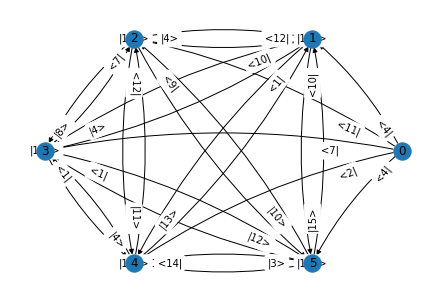

In [46]:
graph = nx.draw(H,pos,with_labels = True,connectionstyle='arc3, rad = 0.1')
labels = nx.get_edge_attributes(H,'weight')
graph2 = nx.draw_networkx_edge_labels(H,pos,edge_labels=edge_label,label_pos = 0.8)

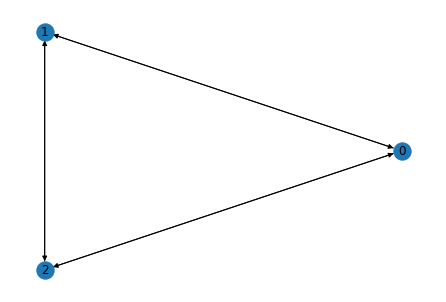

In [34]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph and add a self-loop to node 0
G = nx.complete_graph(3, create_using=nx.DiGraph)
G.add_edge(0, 0)
pos = nx.circular_layout(G)

# As of version 2.6, self-loops are drawn by default with the same styling as
# other edges
nx.draw(G, pos, with_labels=True)

# Add self-loops to the remaining nodes
edgelist = [(1, 1), (2, 2)]
G.add_edges_from(edgelist)

# Draw the newly added self-loops with different formatting
nx.draw_networkx_edges(G, pos, edgelist=edgelist, arrowstyle="<|-", style="dashed")

plt.show()